On this notebook I did some preprocessing on the data before implementing a logistic regression with parameters optimisation.


**Step1: Loading data and data visualisation** \

---


 Load train and test CSV files and change them into pandas datasets 


In [41]:
import pandas as pd

In [42]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

Describe data

In [43]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   StudentId                                       3096 non-null   int64  
 1   Marital status                                  3096 non-null   int64  
 2   Application mode                                3096 non-null   int64  
 3   Application order                               3096 non-null   int64  
 4   Course                                          3096 non-null   int64  
 5   Daytime/evening attendance	                     3096 non-null   int64  
 6   Previous qualification                          3096 non-null   int64  
 7   Previous qualification (grade)                  3096 non-null   float64
 8   Nationality                                     3096 non-null   int64  
 9   Mother's qualification                   

In [44]:
train_df.columns

Index(['StudentId', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricu

Preview the data

In [45]:
train_df.head()

,StudentId,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,51,1,33,1,1,130.0,1,19,...,5,10,11,5,11.000000,0,11.1,0.6,2.02,Dropout
1,2,4,43,1,9238,1,1,120.0,1,37,...,0,6,8,4,13.750000,0,13.9,-0.3,0.79,Graduate
2,3,1,1,1,9130,1,1,140.0,1,4,...,0,6,9,6,14.857143,0,11.1,0.6,2.02,Graduate
3,4,1,17,2,9147,1,1,118.0,1,19,...,0,5,8,3,10.000000,0,11.1,0.6,2.02,Enrolled
4,5,1,53,1,9085,1,42,140.0,1,1,...,4,9,13,7,14.285714,0,8.9,1.4,3.51,Graduate


In [46]:
Category_list = ["Marital status","Application mode","Course","Previous qualification","Nationality", "Mother's qualification", "Mother's occupation","Father's occupation","Father's occupation"]
Binary_list = ["Daytime/evening attendance\t","Displaced","Educational special needs","Debtor","Tuition fees up to date","Gender","Scholarship holder","International"]
Ordinal_list = ['Application order']
Numerical_list = ['Previous qualification (grade)','Admission grade','Age at enrollment','International','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP']


Features correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


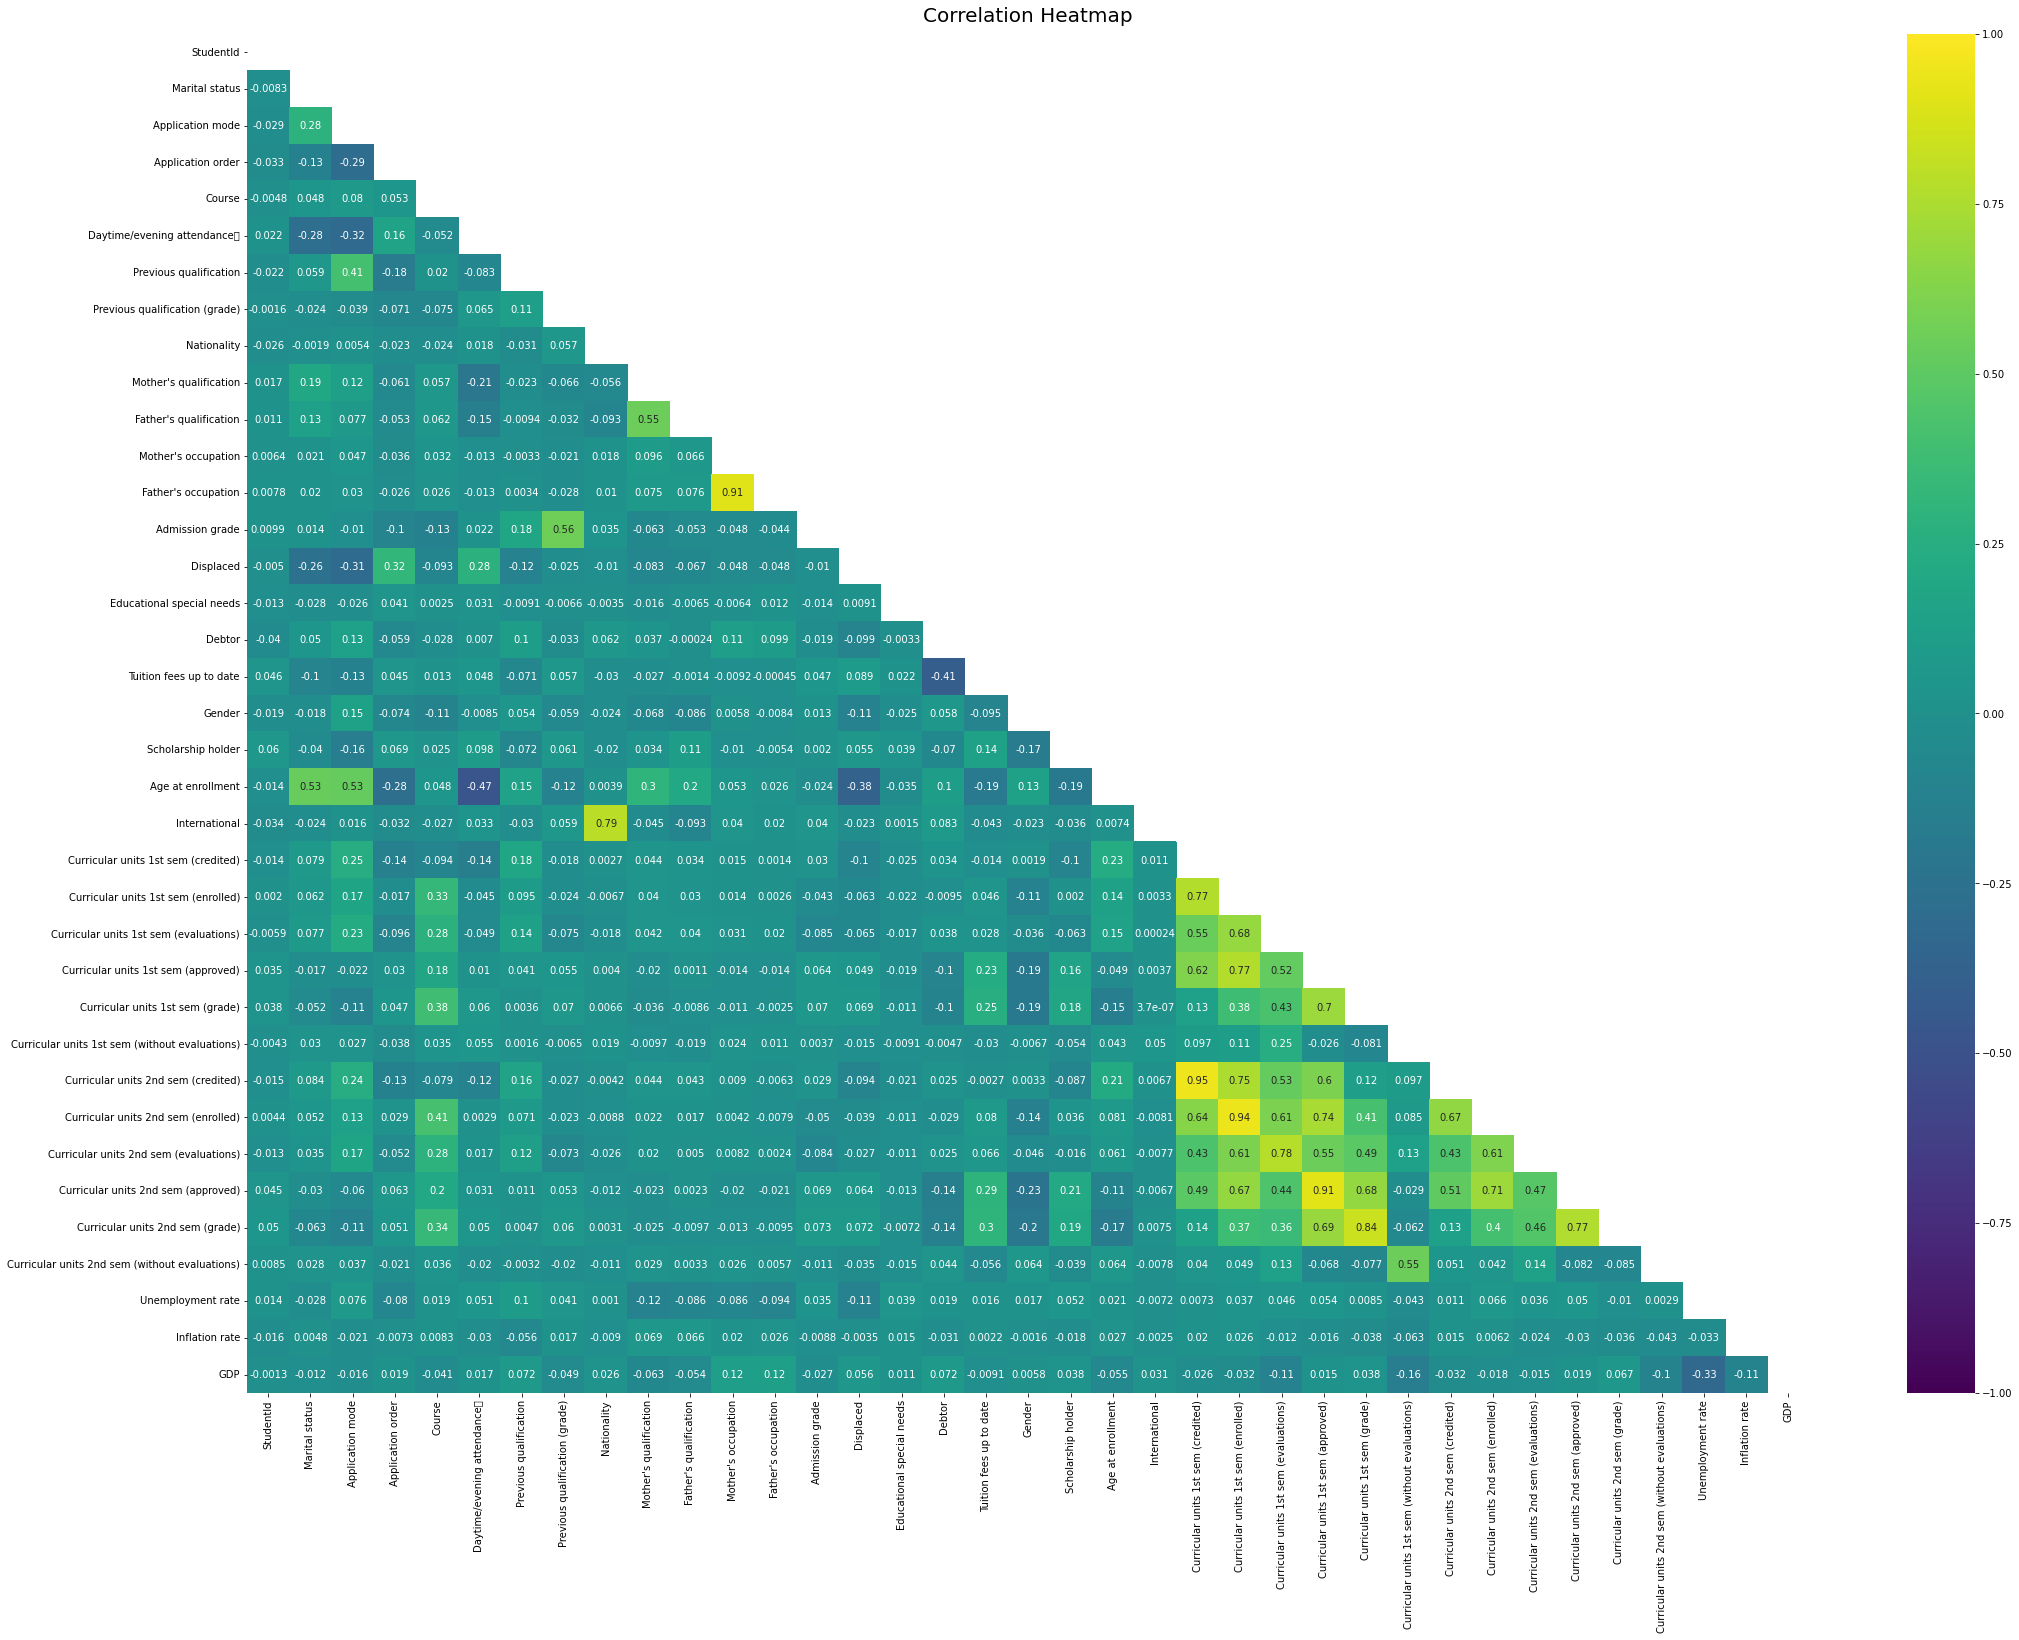

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(35, 25))
corr = train_df.corr()
mask = np.triu(np.ones_like(train_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr, mask = mask, vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

<Figure size 432x288 with 0 Axes>

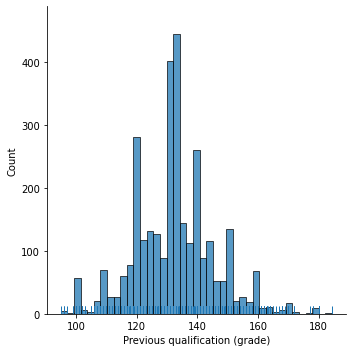

<Figure size 432x288 with 0 Axes>

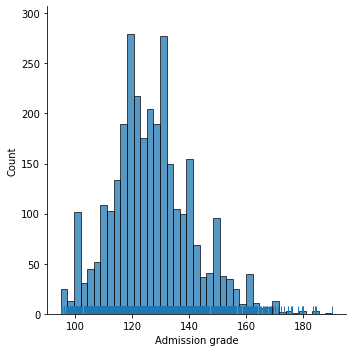

<Figure size 432x288 with 0 Axes>

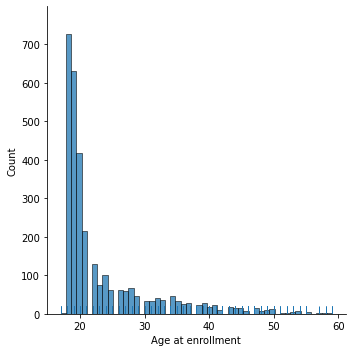

<Figure size 432x288 with 0 Axes>

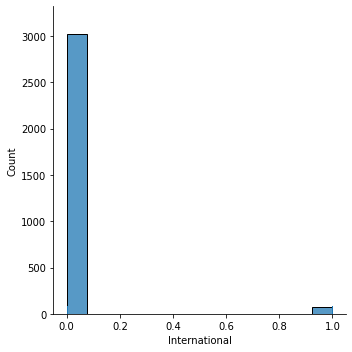

<Figure size 432x288 with 0 Axes>

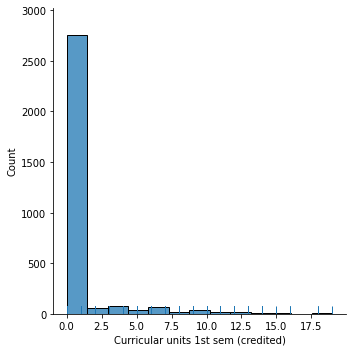

<Figure size 432x288 with 0 Axes>

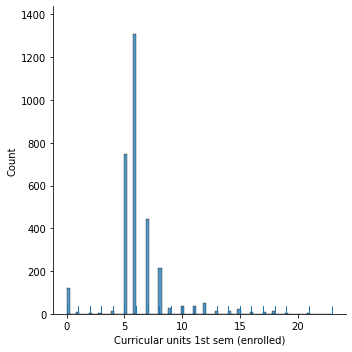

<Figure size 432x288 with 0 Axes>

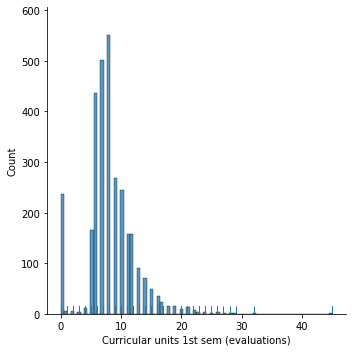

<Figure size 432x288 with 0 Axes>

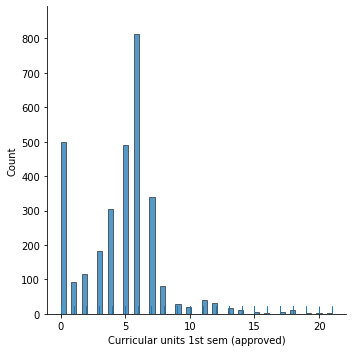

<Figure size 432x288 with 0 Axes>

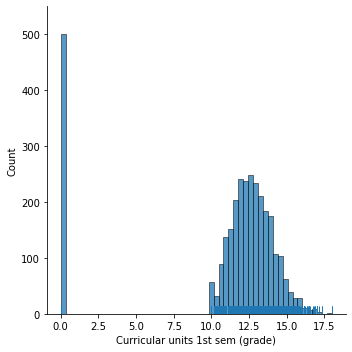

<Figure size 432x288 with 0 Axes>

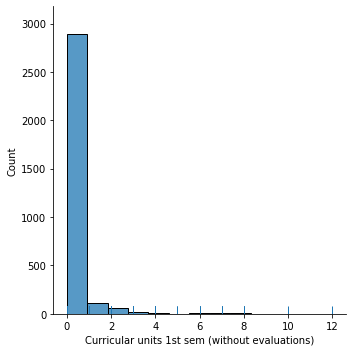

<Figure size 432x288 with 0 Axes>

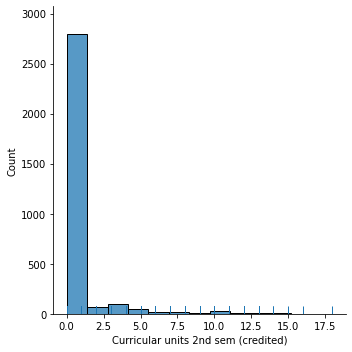

<Figure size 432x288 with 0 Axes>

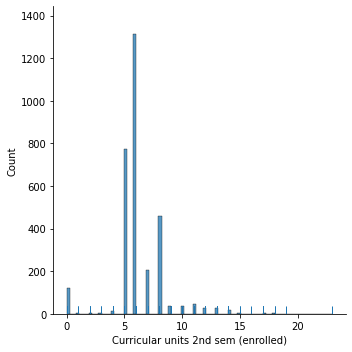

<Figure size 432x288 with 0 Axes>

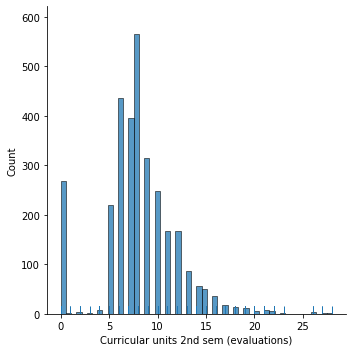

<Figure size 432x288 with 0 Axes>

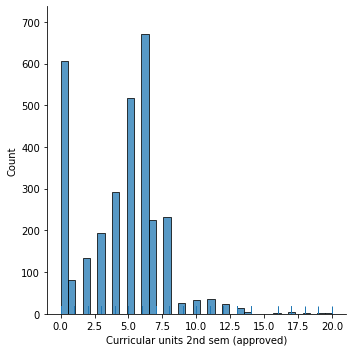

<Figure size 432x288 with 0 Axes>

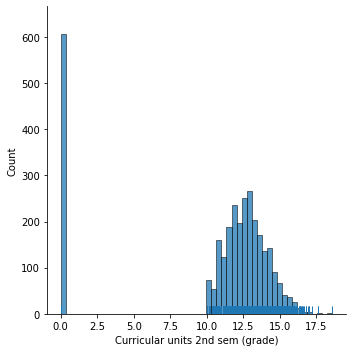

<Figure size 432x288 with 0 Axes>

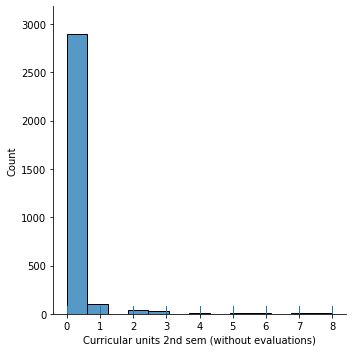

<Figure size 432x288 with 0 Axes>

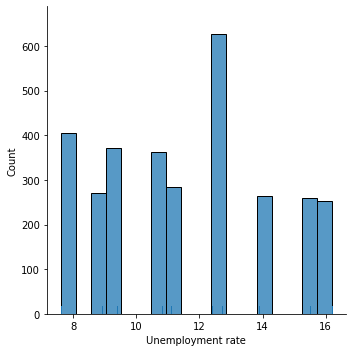

<Figure size 432x288 with 0 Axes>

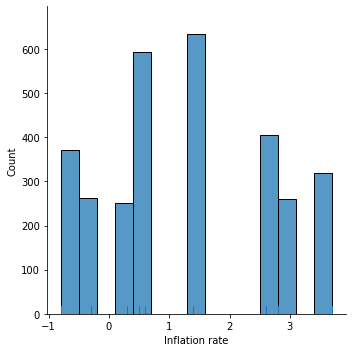

<Figure size 432x288 with 0 Axes>

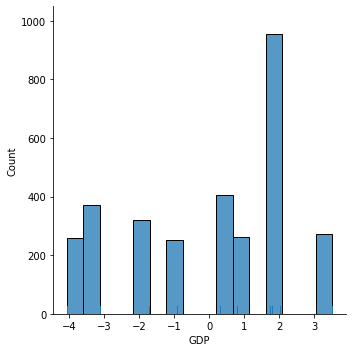

In [48]:
for col in Numerical_list:
  plt.figure()
  sns.displot(train_df[col],kind='hist',rug=True)

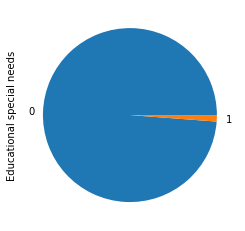

In [49]:
plt.figure()
train_df['Educational special needs'].value_counts().plot.pie()

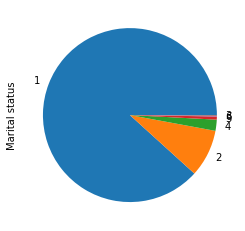

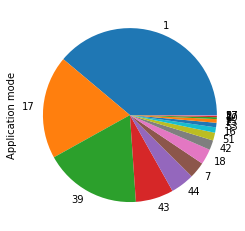

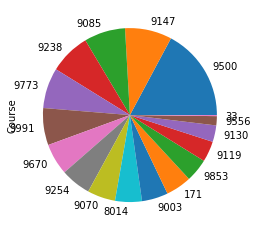

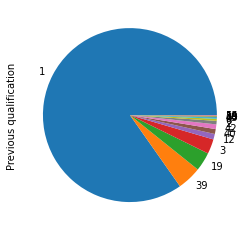

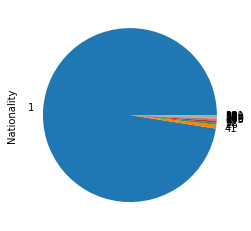

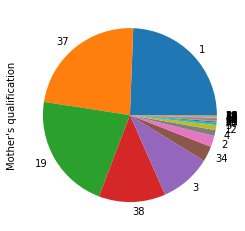

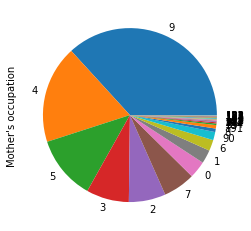

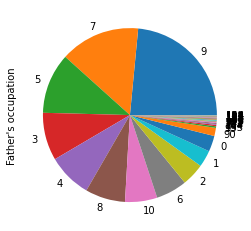

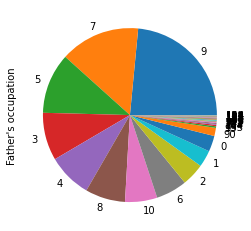

In [50]:
for col in Category_list:
  plt.figure()
  train_df[col].value_counts().plot.pie()

In [51]:
df_sample=train_df.sample(axis=0,n=1000,random_state=42)

df_sample

,StudentId,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1947,1948,1,1,4,171,1,1,133.1,1,1,...,0,0,0,0,0.000000,0,16.2,0.3,-0.92,Graduate
1309,1310,1,43,3,9500,1,1,126.0,1,38,...,0,7,8,5,11.980000,0,7.6,2.6,0.32,Enrolled
1606,1607,1,39,1,9254,1,12,133.1,1,37,...,0,6,11,4,11.800000,0,9.4,-0.8,-3.12,Enrolled
2626,2627,1,17,1,9085,1,1,135.0,1,1,...,0,5,8,3,14.000000,0,12.7,3.7,-1.70,Graduate
2440,2441,1,5,2,9853,1,1,124.0,1,19,...,0,6,7,6,12.000000,0,12.7,3.7,-1.70,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,2612,1,7,1,9500,1,3,130.0,1,37,...,0,8,8,7,14.414286,0,12.7,3.7,-1.70,Graduate
3081,3082,1,1,2,9500,1,1,123.0,1,34,...,0,7,8,4,11.950000,0,7.6,2.6,0.32,Dropout
1575,1576,1,39,1,9147,1,1,110.0,1,37,...,0,5,9,0,0.000000,0,10.8,1.4,1.74,Dropout
2808,2809,4,39,1,9003,1,1,140.0,1,37,...,0,6,10,6,12.333333,0,11.1,0.6,2.02,Enrolled


In [52]:
#plt.figure()
#sns.pairplot(data=df_sample,hue='Target',)
#plt.legend()

Fonctions d'encodage: Ordinal, Category et OneHot encoding 

In [53]:
!pip install category_encoders
import category_encoders as ce

     |████████████████████████████████| 86 kB 2.9 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [54]:

def ordinal(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with ordinal encoding
    """
    encoder= ce.OrdinalEncoder(cols)
    for each in cols:
        df[each] = encoder.fit_transform(df[each])
    return df
  
def category(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with category encoding
    """
    for each in cols:
        df[each] = df[each].astype('category')
    return df
  
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    encoder= ce.OneHotEncoder()
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=True,sparse=True)
        df = pd.concat([df, dummies], axis=1)
    return df


Deleted columns according to precedent observations


In [55]:
columns_to_drop = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (without evaluations)',
    'Nationality',
    'Educational special needs',
    'International'
]

for col in columns_to_drop:
    del train_df[col]
    del test_df[col]

Isolate the result column and drop it from the learning dataset

In [56]:
result=train_df['Target']
id=train_df['StudentId']
data=train_df
del data['Target']

Train Test Split to create the learning and test sets

In [57]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, result, train_size=0.8,test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


logistic regression

In [60]:
#Find the best parameter
clf = LogisticRegression(solver = 'liblinear')
param_grid = {'penalty': ('l1', 'l2'), 'C': [0.1, 0.5, 1.0, 1.5, 2.0], 'class_weight': ('balanced', None),'max_iter':[1000,10000,50000]}
clf_grid = GridSearchCV(estimator = clf, param_grid = param_grid)
clf_grid.fit(X_train, y_train.values.ravel())

print(clf_grid.best_score_)
print(clf_grid.best_params_)


#Fit model with best parameter
clf = LogisticRegression(solver = 'liblinear', C = 0.1, class_weight = None, penalty = 'l1',max_iter=50000)
clf.fit(X_train, y_train.values.ravel())

0.7722091886608016
{'C': 0.5, 'class_weight': None, 'max_iter': 50000, 'penalty': 'l1'}


LogisticRegression(C=0.1, max_iter=50000, penalty='l1', solver='liblinear')

In [61]:
pred=clf.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt


[[132  17  32]
 [ 33  24  63]
 [  5   9 305]]
              precision    recall  f1-score   support

     Dropout       0.78      0.73      0.75       181
    Enrolled       0.48      0.20      0.28       120
    Graduate       0.76      0.96      0.85       319

    accuracy                           0.74       620
   macro avg       0.67      0.63      0.63       620
weighted avg       0.71      0.74      0.71       620

accuracy 0.7435483870967742


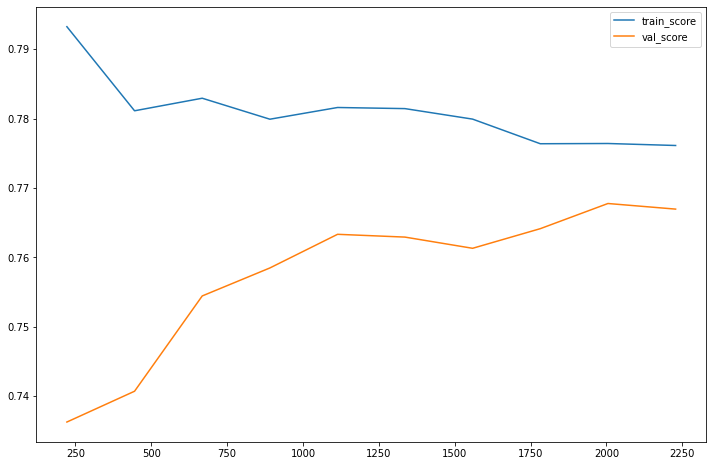

In [63]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("accuracy",accuracy_score(y_test, pred))

N, train_score, val_score = learning_curve(
        clf,
        X_train,
        y_train,
        cv=10,
        train_sizes=np.linspace(0.1,1,10),
        n_jobs=1,
    )

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label="train_score")
plt.plot(N, val_score.mean(axis=1), label="val_score")
plt.legend()




In [64]:
prediction = clf.predict(test_df)
data= pd.DataFrame(prediction)
data[1]=data[0]
data[0]=test_df["StudentId"].astype('Int64')
data.columns=["StudentId","Target"]

In [65]:
data.to_csv('Stacking.csv',columns=["StudentId","Target"],index=False)